In [34]:
# Dependencies and Setup
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
import scipy.stats as st

# Read the data
clean_zip = pd.read_csv(r'Unemployment CSV and ReadMe/cleaned_zip_data.csv')
county_unemployment_df = pd.read_csv('Unemployment CSV and ReadMe/KS_MO_County_Unemployment.csv')
unemployment_df = pd.read_csv(r"KS_MO_Unemployment_Data_Cleaned.csv")
census_data_df = pd.read_csv(r"census_data.csv")
ppp_data_df = pd.read_csv(r"PPP Data Combined.csv")

D:\Python\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
ppp_data_df.head(1)

,Loan Code,Loan Range,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
0,a,5-10 million,"AMERICAN IMPLEMENT, INC.",2302 E MARY ST,GARDEN CITY,KS,67846,423820.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,356.0,4/8/2020,The Western State Bank,KS-01


In [36]:
ppp_loan_count_df = ppp_data_df.groupby(ppp_data_df['Loan Code']).count()

In [37]:
ppp_loan_count_df

,Loan Range,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
Loan Code,,,,,,,,,,,,,,,,
a,133,133,133,133,133,133,133,133,133,133,133,12,130,133,133,133
b,743,743,743,743,743,743,742,741,743,743,743,117,712,743,743,743
c,1409,1409,1409,1409,1409,1409,1406,1409,1409,1409,1409,206,1353,1409,1409,1409
d,5343,5343,5343,5343,5343,5343,5334,5343,5343,5343,5343,500,5138,5343,5343,5343
e,9780,9780,9780,9780,9780,9780,9739,9780,9780,9780,9780,703,9394,9780,9780,9780
f,131944,0,0,131944,131944,131944,130416,131931,131944,131944,131944,5363,125768,131944,131944,131944


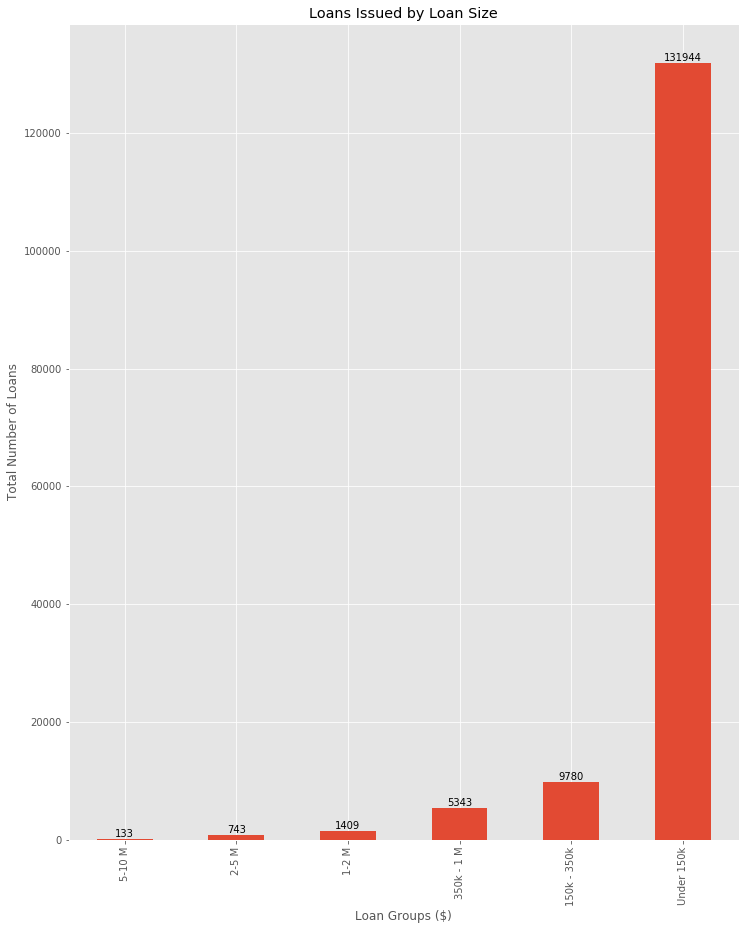

In [38]:
plt.style.use('ggplot')

loan_amount = ppp_loan_count_df['Zip']
x = ['5-10 M', '2-5 M', '1-2 M', '350k - 1 M', '150k - 350k', 'Under 150k']
x_labels = ppp_loan_count_df['Zip']

plt.figure(figsize=(12, 15))
ax = loan_amount.plot(kind='bar')
ax.set_title('Loans Issued by Loan Size')
ax.set_xlabel('Loan Groups ($)')
ax.set_ylabel('Total Number of Loans')
ax.set_xticklabels(x)

rects = ax.patches

# code below: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
for rect, loan_amount in zip(rects, loan_amount):                
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, loan_amount,
            ha='center', va='bottom')
plt.savefig('Loans_Issued.png')
plt.show()